#                                       Exploring Earthquake Data From USGS

    This is an exploration of earthquake data for the past 50 years. Data will be query from the USGS from         September 1, 1972 to September 1, 2022 with a Magnitude of 4.5 or greater. 
    

### Background:

        The strenght of an earthquake is measured by its magnitude which is units based on the Richter scale. It's        determined from the logarithm of the amplitude of waves recorded by seismographs. The event can  be broken down into 2 different types of waves. The P wave is the fastest wave which will arrive first then the S wave will trail behind as shown below. P waves are also known as compressional wave that propagates    through  the earth like sound waves. In the diagram below compress close to each other and then expand away    from each other as they move through  the ground. The s wave is more like a wave that most people are familiar with. They move the rock up and down like an ocean wave. they are also known as the shear wave. 

![waves](wave.gif)

        Most earthquakes happen along a fault where 2 or more plates are moving in various directions. The plates   can interact in 3 different ways. Convergent plate boundaries produce large mountains by one of the plates     being pushed below the other plate causing lava to billow up from the depths. The 2nd type is divergent plate        boundaries. This is when 2 plates are moving away from each other allowing lava to come up. This is one of the main features of the Atlantic sea floor. The last type of plate boundary is transform. This is when the plates are moving in opposite directions grinding on each other. 

![Tectonic_plate_boundaries](Tectonic_plate_boundaries.png)

    These 3 types of boundaries make up the movement of the earth's crust. When they are plotted on a map with     earthquake locations, there is a clear trend that most of them happen along these regions as shown below. 

![plateboundries](plate-boundary-map-780.jpeg)

### Analysis Questions:
    - Where has the strongest earthquake taken place? 

In [2]:
#importing modules that will be used in this analysis

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib.image import imread
import numpy as np
import urllib
from IPython.display import Image
import urllib.request


### Loading in data: 

In [3]:
# When more than 2 years of data are queried from the usgs.gov website an error will occur. 
# This is resolved by a for loop that iterates through the range of years needed for this analysis

start_year = 1906
end_year = 2023

for i in range(start_year, end_year, 2):
    url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=' + str(i) + '-1-1&endtime=' + str(i+2) + '-2-26&minmagnitude=4.5&orderby=time'
    urllib.request.urlretrieve(url,'query_'+str(i)+'-'+str(i+2)+'.csv')
    

# This created 25 csv files that need to be cleaned then merged together.
# Code is commented out so when the kernal is restarted it wont run the query again. 

In [4]:
# using a for loop to load data into different dataframes

namespace = globals()

for i in range(1906, 2024, 2):
    namespace['df_%d' % i] = pd.read_csv('query_'+str(i)+'-'+str(i+2)+'.csv')
   

In [11]:
df


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,10.000,5.00,mb,46.0,91.0,1.293,0.80,...,2023-02-27T00:11:38.040Z,"77 km NNW of Aksu, China",earthquake,6.59,1.897,0.078,52.0,reviewed,us,us
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,200.365,4.80,mb,67.0,85.0,5.158,0.95,...,2023-02-26T23:58:32.040Z,"Pagan region, Northern Mariana Islands",earthquake,10.27,7.539,0.043,165.0,reviewed,us,us
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,10.000,4.90,mb,45.0,77.0,1.223,0.82,...,2023-02-27T00:21:32.040Z,NaN,earthquake,6.27,1.869,0.086,42.0,reviewed,us,us
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,10.000,4.60,mb,51.0,217.0,5.661,0.57,...,2023-02-26T22:25:29.040Z,northern East Pacific Rise,earthquake,11.79,1.984,0.038,205.0,reviewed,us,us
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,134.299,4.50,mb,108.0,62.0,2.866,0.82,...,2023-02-26T19:38:26.040Z,"84 km NE of Otrada, Russia",earthquake,8.66,5.863,0.059,84.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303480,1906-01-21T13:49:33.570Z,34.1750,138.0250,300.000,7.40,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,NaN,25.000,0.300,NaN,reviewed,iscgem,iscgem
303481,1906-01-09T23:04:45.570Z,49.2560,18.4210,15.000,5.63,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:36:39.809Z,"10 km WNW of Byt?a, Slovakia",earthquake,NaN,3.500,0.650,NaN,reviewed,iscgem,iscgem
303482,1906-01-08T00:15:00.000Z,39.3000,-96.6000,NaN,4.90,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,Kansas,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,bar
303483,1906-01-06T21:31:33.220Z,53.4180,170.1000,35.000,6.58,mw,NaN,NaN,NaN,NaN,...,2022-04-25T20:39:47.898Z,"216 km WNW of Attu Station, Alaska",earthquake,NaN,3.500,0.200,NaN,reviewed,iscgem,iscgem


### Cleaning Data:


In [ ]:
# Lets first look at the shape of the data which it has 5383 rows by 22 columns. 

df_1906.shape

In [16]:
# Now lets look at one of the dataframes to see what we are working with. 

df_1906

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1974-08-31T21:39:44.300Z,51.329,173.606,14.0,4.60,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:26.102Z,"171 km S of Attu Station, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1974-08-31T18:21:37.100Z,-5.535,150.882,120.0,5.30,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:26.101Z,"82 km E of Kimbe, Papua New Guinea",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
2,1974-08-31T18:05:04.400Z,0.579,97.885,33.0,4.90,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:26.100Z,"162 km SW of Sibolga, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,1974-08-31T17:13:55.900Z,39.484,74.002,33.0,4.90,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:26.099Z,"145 km N of Murghob, Tajikistan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
4,1974-08-31T11:36:49.500Z,-18.488,-69.770,128.0,4.80,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:26.096Z,"55 km E of Arica, Chile",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,1972-09-03T16:48:29.470Z,35.919,73.416,30.0,6.20,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:40:14.429Z,"42 km SW of Gahkuch, Pakistan",earthquake,NaN,3.9,0.20,NaN,reviewed,iscgem,iscgem
5379,1972-09-03T06:31:22.990Z,-5.577,151.182,25.0,6.25,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:40:12.548Z,"115 km E of Kimbe, Papua New Guinea",earthquake,NaN,4.7,0.20,NaN,reviewed,iscgem,iscgem
5380,1972-09-02T10:37:41.810Z,40.083,53.650,30.0,5.12,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:40:05.661Z,"59 km E of Türkmenba?y, Turkmenistan",earthquake,NaN,5.0,0.20,NaN,reviewed,iscgem,iscgem
5381,1972-09-02T01:49:40.120Z,29.440,130.500,52.2,6.20,mw,NaN,NaN,NaN,NaN,...,2022-04-26T20:39:54.384Z,"88 km S of Yudomari, Japan",earthquake,NaN,4.9,0.20,NaN,reviewed,iscgem,iscgem


     We can see NaN values in columns in a couple of columns. Lets take a closer look at which columns have the nan values.

In [6]:
# looking at the nan values in the data.

df_1906.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                5365
gap                5365
dmin               5380
rms                5365
net                   0
id                    0
updated               0
place                12
type                  0
horizontalError    5365
depthError         5117
magError           5119
magNst             5365
status                0
locationSource        0
magSource             0
dtype: int64

      If we used the NaN drop function we would be left with a couple rows. Lets drop some of the rows that we wont need for this analysis. 

In [17]:
# Drop Columns that arent needed 

namespace = globals()

for i in range(1906,2023,2):
    namespace['df_%d' % i] = namespace['df_%d' % i][['time', 'latitude','longitude', 'depth', 'mag']]


In [18]:
#Checking to see if only the columns that were requested are in the dataframe. 

df_1972

,time,latitude,longitude,depth,mag
0,1974-08-31T21:39:44.300Z,51.329,173.606,14.0,4.60
1,1974-08-31T18:21:37.100Z,-5.535,150.882,120.0,5.30
2,1974-08-31T18:05:04.400Z,0.579,97.885,33.0,4.90
3,1974-08-31T17:13:55.900Z,39.484,74.002,33.0,4.90
4,1974-08-31T11:36:49.500Z,-18.488,-69.770,128.0,4.80
...,...,...,...,...,...
5378,1972-09-03T16:48:29.470Z,35.919,73.416,30.0,6.20
5379,1972-09-03T06:31:22.990Z,-5.577,151.182,25.0,6.25
5380,1972-09-02T10:37:41.810Z,40.083,53.650,30.0,5.12
5381,1972-09-02T01:49:40.120Z,29.440,130.500,52.2,6.20


In [19]:
df_1976

,time,latitude,longitude,depth,mag
0,1978-08-31T21:05:31.300Z,51.131,98.393,33.0,4.6
1,1978-08-31T17:03:12.500Z,19.835,-64.864,45.0,4.7
2,1978-08-31T16:21:45.900Z,34.889,135.621,368.0,4.8
3,1978-08-31T14:00:00.200Z,37.275,-116.357,0.0,5.6
4,1978-08-31T10:08:09.800Z,6.576,126.903,61.0,5.7
...,...,...,...,...,...
7004,1976-09-01T08:10:43.200Z,-18.055,-178.416,600.0,5.0
7005,1976-09-01T04:06:20.500Z,10.962,125.827,33.0,5.1
7006,1976-09-01T02:19:51.900Z,-14.826,-172.851,5.0,4.8
7007,1976-09-01T02:17:25.100Z,51.977,-176.171,116.0,4.5


In [20]:
# lets merge all the data into one dataframe
# data = []

# for i in range(2020,1971,-2): # we want to merge the data in the opposite direction so it goes from newest to oldest 
#     vars(data) += (['df_%d' % i +',']) # not able to create a list to merge data so hardcoding will be used
# data

SyntaxError: 'function call' is an illegal expression for augmented assignment (2334841018.py, line 5)

In [21]:
# This is the solution with hardcoding

df = pd.concat([df_2022, df_2020, df_2018, df_2016, df_2014, df_2012, df_2010, 
                df_2008, df_2006, df_2004, df_2002, df_2000, 
                df_1998, df_1996, df_1994, df_1992, df_1990, 
                df_1988, df_1986, df_1984, df_1982, df_1980,
                df_1978, df_1976, df_1974, df_1972, df_1970, 
                df_1968, df_1966, df_1964, df_1962, df_1960, 
                df_1958, df_1956, df_1954, df_1952, df_1950,
                df_1948, df_1946, df_1944, df_1942, df_1940,
                df_1938, df_1936, df_1934, df_1932, df_1930,
                df_1928, df_1926, df_1924, df_1922, df_1920,
                df_1918, df_1916, df_1914, df_1912, df_1910,
                df_1908, df_1906, df_1904, ])

df 

,time,latitude,longitude,depth,mag
0,2022-08-31T21:45:05.367Z,-21.5640,175.5995,10.000,5.40
1,2022-08-31T17:14:47.506Z,11.8809,142.2450,35.000,4.60
2,2022-08-31T15:50:53.284Z,-60.5422,-25.4199,10.000,4.60
3,2022-08-31T14:02:17.685Z,37.5368,26.8049,10.000,4.60
4,2022-08-31T12:36:44.583Z,28.9851,66.3703,9.664,4.60
...,...,...,...,...,...
5378,1972-09-03T16:48:29.470Z,35.9190,73.4160,30.000,6.20
5379,1972-09-03T06:31:22.990Z,-5.5770,151.1820,25.000,6.25
5380,1972-09-02T10:37:41.810Z,40.0830,53.6500,30.000,5.12
5381,1972-09-02T01:49:40.120Z,29.4400,130.5000,52.200,6.20


In [22]:
# We can see the 

df.reset_index(drop=True, inplace=True) # resetting the index on the new dataframe
df

,time,latitude,longitude,depth,mag
0,2022-08-31T21:45:05.367Z,-21.5640,175.5995,10.000,5.40
1,2022-08-31T17:14:47.506Z,11.8809,142.2450,35.000,4.60
2,2022-08-31T15:50:53.284Z,-60.5422,-25.4199,10.000,4.60
3,2022-08-31T14:02:17.685Z,37.5368,26.8049,10.000,4.60
4,2022-08-31T12:36:44.583Z,28.9851,66.3703,9.664,4.60
...,...,...,...,...,...
262611,1972-09-03T16:48:29.470Z,35.9190,73.4160,30.000,6.20
262612,1972-09-03T06:31:22.990Z,-5.5770,151.1820,25.000,6.25
262613,1972-09-02T10:37:41.810Z,40.0830,53.6500,30.000,5.12
262614,1972-09-02T01:49:40.120Z,29.4400,130.5000,52.200,6.20


In [23]:
# Checking the Nan values to see if any are present

df.isna().sum()

time         0
latitude     0
longitude    0
depth        2
mag          0
dtype: int64

In [24]:
# dropping the 2 nan values

df.dropna(inplace=True)
df.isna().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
dtype: int64

In [25]:
# checking to see if any data is a duplicate

df.duplicated().sum()

0

### Analysis:

In [26]:
# lets get some stat's for the data
df.describe()

,latitude,longitude,depth,mag
count,262614.000000,262614.000000,262614.000000,262614.000000
mean,3.485649,42.741295,72.102248,4.882591
std,29.250407,121.112623,117.888260,0.409994
min,-84.133000,-179.999700,-3.000000,3.380000
25%,-17.777000,-71.313000,10.000000,4.600000
50%,-0.268000,100.823850,33.000000,4.800000
75%,28.027750,142.443150,64.000000,5.000000
max,87.386000,180.000000,700.900000,9.100000


#### The strongest earthquake was 8.2. Lets dive deeper into that. 

In [27]:
max_index = df['mag'].idxmax() # Creating a variable of the max magnitude 
max_data = df.loc[max_index, :] # storing the row of the largest earthquake
max_data

time         2011-03-11T05:46:24.120Z
latitude                       38.297
longitude                     142.373
depth                            29.0
mag                               9.1
Name: 87102, dtype: object

#### The strongest earthquake with a magnitude of 8.2 and a depth of 35 km took place on July 29, 2021. Lets plot and see were its located on the earth.

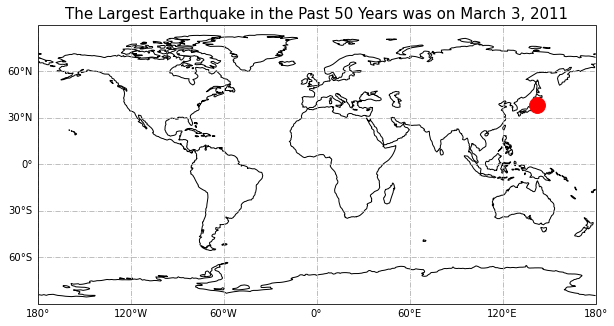

In [28]:

plt.figure(figsize=(10, 10)) # creating a figure with size being 10 by 10

ax = plt.axes(projection=ccrs.PlateCarree()) # Projecting PlateCarree from the cartopy library

ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) # Zooming in on the graph

gl = ax.gridlines(linestyle='-.', draw_labels=True) # adding gridlines to the plot
gl.top_labels = False # removing the top label
gl.right_labels = False # removing the right label

ax.coastlines() # adding coastlines to the plot

p = ax.scatter(x=max_data['longitude'], y=max_data['latitude'], s=250, c='r') # Plotting the max magnitude data point

plt.title('The Largest Earthquake in the Past 50 Years was on March 3, 2011', fontsize=15)

plt.show()

### 2011 Tōhoku earthquake and tsunami

    This was one of the strongest earthquakes to rock the world in the past 50 years. During this event, 19,759 lives were lost when a towering wall of water washed up agains the shores. This cause the Fukushima Daiichi nuclear disaster, primarily the meltdowns of three of its reactors. 
    
    
![plateboundries](SH-60B_helicopter_flies_over_Sendai.jpeg)
This figure shows the port of Sendai of the tsunami took place.

#### Lets plot all the data to see where earthquakes take place around the globe. 

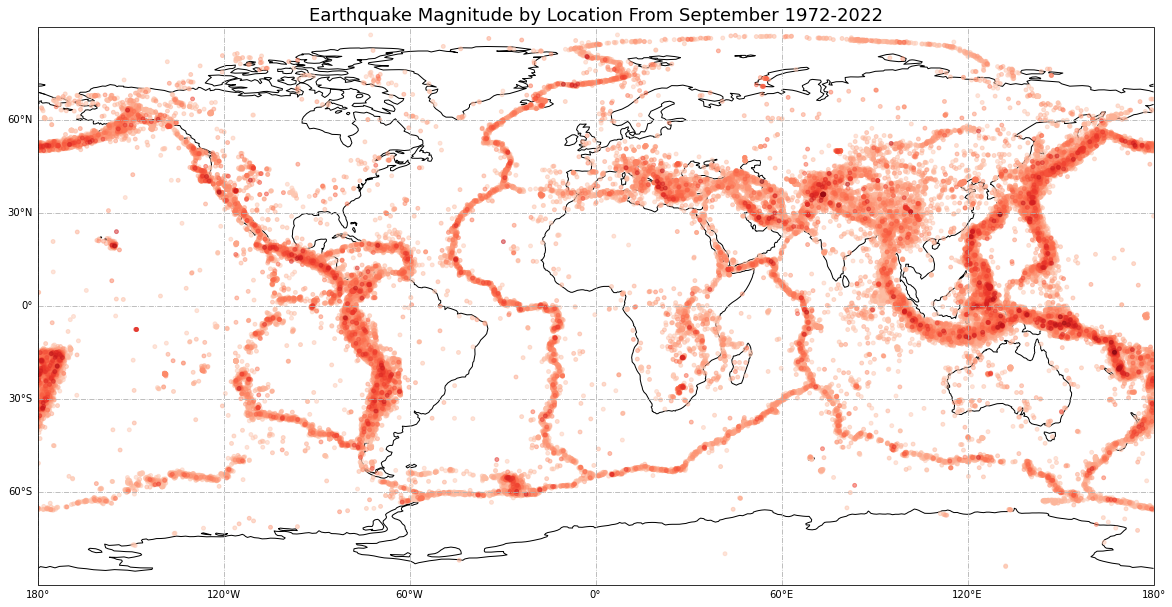

In [37]:

plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=df['longitude'], y=df['latitude'], c =df['mag'].sort_values(), cmap='Reds', alpha=0.5, s=15)
plt.title('Earthquake Magnitude by Location From September 1972-2022', fontsize=18)

#cb = figure.colorbar(p, ax=ax, shrink=0.38)


plt.ylabel('Magnitude', fontsize=16)

plt.show()
#### still need to figure out how to add fig, to the graph without throughing an error. also need colorbar

     Lets take a look at where magnitude 8 or greater have taken place in the past 50 years. 

In [30]:
strong_earthequakes = df[df['mag']>=8] # create an new Dataframe with earthquakes of 8 or greater
strong_earthequakes.shape

(40, 5)

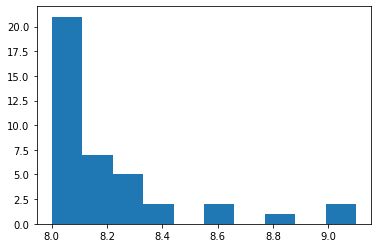

In [31]:
# Lets take a quick look at a histogram of the strong data magnitude
plt.hist(strong_earthequakes['mag'])

plt.show()

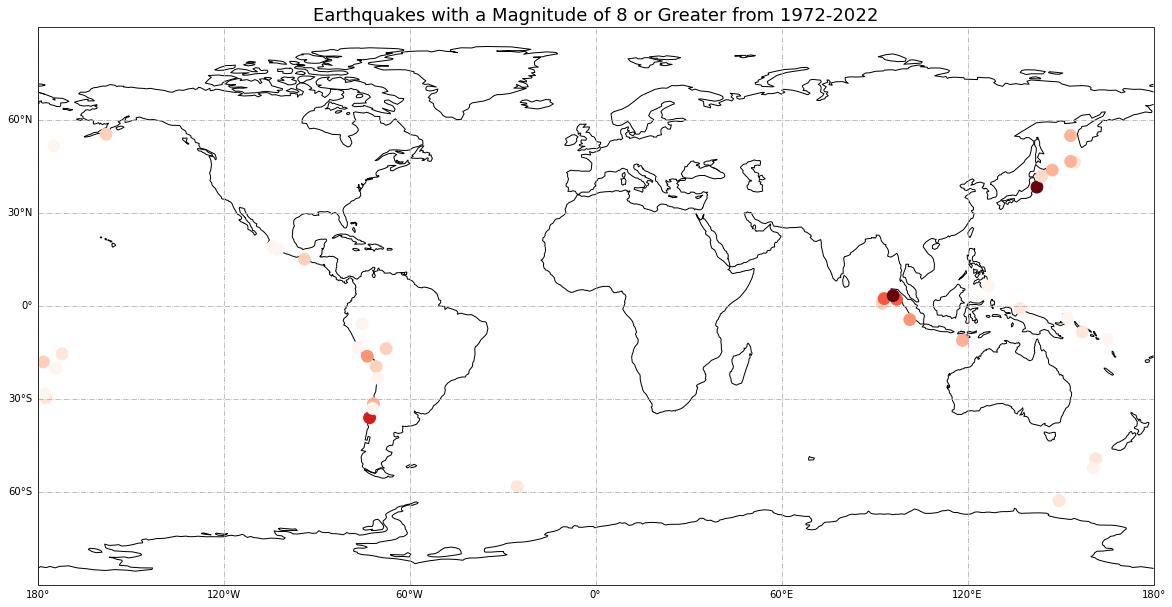

In [36]:


plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) # Zooming in on the graph

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=strong_earthequakes['longitude'], y=strong_earthequakes['latitude'], c =strong_earthequakes['mag'], cmap='Reds', s=140)
plt.title('Earthquakes with a Magnitude of 8 or Greater from 1972-2022', fontsize=18)

#cb = figure.colorbar(p, ax=ax, shrink=0.38)


#plt.ylabel('Magnitude', fontsize=16)

plt.show()

WE should look at How offen these strong events happen by strenth

In [35]:
strong_earthequakes.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
dtype: object

In [36]:
strong_earthequakes['time'] = pd.to_datetime(strong_earthequakes['time'])

/var/folders/xk/1h2bmhd16677hq_kztjppff80000gn/T/ipykernel_59226/3149064179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_earthequakes['time'] = pd.to_datetime(strong_earthequakes['time'])


In [38]:
strong_earthequakes.dtypes

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
depth                    float64
mag                      float64
dtype: object

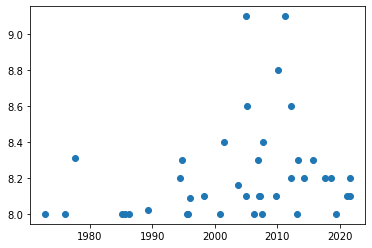

In [39]:
plt.scatter(strong_earthequakes['time'], strong_earthequakes['mag'])